In [1]:
import pandas as pd
import numpy as np

In [289]:
df = pd.read_csv("Dataset for Career Factory 22032022.csv")

# Вытаскиваем список активированных клиентов:

In [3]:
count_event_per_client = df.groupby('client_id')['event_name'].count().reset_index().sort_values('event_name', ascending=False)

In [4]:
count_event_per_client

,client_id,event_name
95,100095,18013
817,100817,6234
77,100077,6064
190,100190,4363
651,100651,3358
...,...,...
13869,113869,0
15151,115151,0
4639,104639,0
4647,104647,0


Оставим только тех пользователей, для которых аккаунт первый

In [79]:
df = df[df['first_account_for_user'] == True]

In [157]:
df

,Unnamed: 0,account_id,account_creationdate,client_id,client_creationdate,admin_status,country_group,industry,hear_source,support_provided,...,first_account_for_user,current_account_status,ltv_predicted,ig_activation_dttm,trial_dttm,paid_dttm,pro_dttm,first_ig_flow_publish_dttm,event_name,event_dttm
10,10,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,True,free,9679,NaN,NaN,NaN,NaN,NaN,web.page_questionnaire.todo_list_personalizati...,2021-10-05 20:40:49.401840
9,9,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,True,free,9679,NaN,NaN,NaN,NaN,NaN,todo_list_item.verify_email.done,2021-10-05 20:41:26.531285
8,8,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,True,free,9679,NaN,NaN,NaN,NaN,NaN,todo_list_item.verify_email.done,2021-10-05 20:41:26.531415
7,7,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,True,free,9679,NaN,NaN,NaN,NaN,NaN,todo_list_item.connect_ig_account.done,2021-10-05 20:41:26.531569
6,6,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,True,free,9679,NaN,NaN,NaN,NaN,NaN,todo_list_item.connect_ig_account.done,2021-10-05 20:41:26.531576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869274,869274,17559,2021-10-21 17:43:24.818691,115969,2021-10-21 17:43:01.304537,1st admin,South America,Other,Recommended by friend or colleague,False,...,True,free,12594,2021-10-22 23:07:19.096855,NaN,NaN,NaN,2021-10-21 17:46:12.231707,mobile.automations_list__opened,2021-10-21 17:44:33.261467
869273,869273,17559,2021-10-21 17:43:24.818691,115969,2021-10-21 17:43:01.304537,1st admin,South America,Other,Recommended by friend or colleague,False,...,True,free,12594,2021-10-22 23:07:19.096855,NaN,NaN,NaN,2021-10-21 17:46:12.231707,mobile.automations_list__new__clicked,2021-10-21 17:44:48.501725
869272,869272,17559,2021-10-21 17:43:24.818691,115969,2021-10-21 17:43:01.304537,1st admin,South America,Other,Recommended by friend or colleague,False,...,True,free,12594,2021-10-22 23:07:19.096855,NaN,NaN,NaN,2021-10-21 17:46:12.231707,mobile.automations_list__closed,2021-10-21 17:44:48.738427
869271,869271,17559,2021-10-21 17:43:24.818691,115969,2021-10-21 17:43:01.304537,1st admin,South America,Other,Recommended by friend or colleague,False,...,True,free,12594,2021-10-22 23:07:19.096855,NaN,NaN,NaN,2021-10-21 17:46:12.231707,mobile.automations_promo__opened,2021-10-21 17:45:01.412871


Интересные ивенты: web.audience.subscriber.click, web.settings.invite_new_user.click

In [498]:
for user in df['event_name'].value_counts().index:
    print(user)

web.interface.dashboard.page_view
web.page_view.content
web.page_view.edit_content
web.home_tab.todo_list.shown
web.interface.settings.pageview
web.builder.floating_menu.delete_node
web.builder.starting_step_node_sidebar.opened
web.builder.node_menu.create_node
web.builder.publish_attempt
todo_list_item.connect_ig_account.done
todo_list_item.verify_email.done
web.builder_tab.quick_campaign_list.item.impression
web.dashboard.product_tips.show
web.builder.add_trigger.click
web.interface.live_chat.pageview
web.interface.audience.pageview
web.builder.sidebar.create_block
web.broadcast.preview.click
web.builder.addtrigger.modal.add
web.page_view.tutorial.show
web.page_questionnaire.todo_list_personalization.shown
web.builder.publish_success
mobile.dialog_list__open
web.settings.instagram_section.open
web.page_view.growth_tools
todo_list_item.try_ig_automation.started
web.interface.my_account.pageview
mobile.automations_list__closed
web.onboarding.run
web.settings.messenger_section.open
web.

In [413]:
df[(df['event_name'].notnull())&(df['event_name'].str.contains('todo_list_item'))]['event_name'].value_counts()

todo_list_item.connect_ig_account.done                          14783
todo_list_item.verify_email.done                                14510
todo_list_item.try_ig_automation.started                         5363
todo_list_item.do_keyword_onboarding_campaign.started            4450
todo_list_item.try_ig_automation.done                            3673
todo_list_item.start_trial.done                                  2219
todo_list_item.increase_engagement_and_organic_reach.started      224
todo_list_item.start_trial.started                                167
todo_list_item.enable_story_mention_reply.started                  75
todo_list_item.redirect_customers_to_landing_page.started          68
todo_list_item.automate_answers_on_common_questions.started        61
Name: event_name, dtype: int64

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654223 entries, 10 to 869270
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  654223 non-null  int64  
 1   account_id                  654223 non-null  int64  
 2   account_creationdate        654121 non-null  object 
 3   client_id                   654223 non-null  int64  
 4   client_creationdate         652734 non-null  object 
 5   admin_status                654223 non-null  object 
 6   country_group               648383 non-null  object 
 7   industry                    654223 non-null  object 
 8   hear_source                 654223 non-null  object 
 9   support_provided            654223 non-null  bool   
 10  initial_channel             654223 non-null  object 
 11  ig_followerscount           654223 non-null  float64
 12  ig_enable_dttm              654223 non-null  object 
 13  traffic_sourc

In [80]:
df = df.sort_values(['client_id', 'event_dttm'])

In [81]:
event_df = df[['client_id', 'event_name', 'event_dttm']]

In [82]:
event_df['event_dttm'] = pd.to_datetime(event_df['event_dttm'])

C:\Users\Lemae\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
event_df['diff'] = event_df.groupby('client_id')['event_dttm'].diff(1)

In [84]:
event_df = event_df.reset_index()

In [85]:
sessions_start_df = event_df[(event_df['diff'].isnull()) | (event_df['diff'] > '1800 seconds')]
sessions_start_df['session_id'] = sessions_start_df['index']

In [86]:
sessions_start_df

,index,client_id,event_name,event_dttm,diff,session_id
0,10,100000,web.page_questionnaire.todo_list_personalizati...,2021-10-05 20:40:49.401840,NaT,10
11,27,100000,mobile.dialog_list__open,2021-10-05 21:45:46.695597,0 days 00:35:10.428174,27
18,20,100000,web.interface.dashboard.page_view,2021-10-10 20:49:03.404224,4 days 23:02:33.154560,20
28,44,100001,web.page_questionnaire.todo_list_personalizati...,2021-10-21 10:55:46.023532,NaT,44
45,60,100002,web.page_questionnaire.todo_list_personalizati...,2021-09-30 12:05:05.381512,NaT,60
...,...,...,...,...,...,...
654127,869062,115962,mobile.automations_promo__default_reply__setup...,2021-09-20 13:31:52.827302,NaT,869062
654128,869090,115963,web.page_questionnaire.todo_list_personalizati...,2021-09-27 21:38:53.486325,NaT,869090
654156,869128,115964,web.page_questionnaire.todo_list_personalizati...,2021-09-24 05:36:31.466922,NaT,869128
654194,869154,115966,web.page_questionnaire.todo_list_personalizati...,2021-09-26 23:41:02.563596,NaT,869154


In [87]:
event_df = event_df.merge(sessions_start_df[['index', 'session_id']], how = 'left', on = 'index')

In [88]:
event_df['is_first_event_in_session'] = event_df['index'] == event_df['session_id']

In [89]:
event_df['session_id'] = event_df['session_id'].fillna(method='ffill')

In [90]:
event_df = event_df[['index', 'client_id', 'event_name', 'event_dttm', 'session_id', 'is_first_event_in_session']]

In [91]:
event_df['time_on_page'] = event_df.groupby(['session_id'])['event_dttm'].diff(1)

In [92]:
event_df['time_on_page'] = event_df.groupby(['session_id'])['time_on_page'].shift(-1)

In [93]:
event_df['time_on_page'] = event_df['time_on_page'] / np.timedelta64(1, 's')

In [94]:
print('Количество пользователей', event_df['client_id'].nunique())
print('Количество просмотров страниц (событий) у пользователей', event_df['session_id'].count())
print('Среднее время просмотра страниц у активированных пользователей, в сек', event_df['time_on_page'].mean())

Количество пользователей 12847
Количество просмотров страниц (событий) у пользователей 654223
Среднее время просмотра страниц у активированных пользователей, в сек 43.07739654242312


In [95]:
first_session = event_df.groupby('client_id')['session_id'].min().reset_index()

In [96]:
first_session['first_session'] = True

In [97]:
event_df = event_df.merge(first_session, how = 'left', on = ['client_id', 'session_id'])

In [98]:
event_df = event_df[event_df['first_session'] == True]

In [99]:
print('Количество пользователей', event_df['client_id'].nunique())
print('Количество сессий', event_df['session_id'].nunique())
print('Количество просмотров страниц (событий)', event_df['index'].count())
print('Среднее время просмотра страниц, в сек', event_df['time_on_page'].mean())

Количество пользователей 12847
Количество сессий 12847
Количество просмотров страниц (событий) 265860
Среднее время просмотра страниц, в сек 35.16014399339262


In [100]:
last_event = event_df[event_df['time_on_page'].isnull()]

In [102]:
first_event = sessions_start_df[['client_id', 'event_name', 'event_dttm', 'session_id']]

In [103]:
from datetime import datetime, timedelta
last_event['event_name'] = 'last_event'
last_event['event_dttm'] = last_event['event_dttm'] + timedelta(minutes=1)
first_event['event_name'] = 'first_event'
first_event['event_dttm'] = first_event['event_dttm'] - timedelta(minutes=1)

C:\Users\Lemae\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
first_event

,client_id,event_name,event_dttm,session_id
0,100000,first_event,2021-10-05 20:39:49.401840,10
11,100000,first_event,2021-10-05 21:44:46.695597,27
18,100000,first_event,2021-10-10 20:48:03.404224,20
28,100001,first_event,2021-10-21 10:54:46.023532,44
45,100002,first_event,2021-09-30 12:04:05.381512,60
...,...,...,...,...
654127,115962,first_event,2021-09-20 13:30:52.827302,869062
654128,115963,first_event,2021-09-27 21:37:53.486325,869090
654156,115964,first_event,2021-09-24 05:35:31.466922,869128
654194,115966,first_event,2021-09-26 23:40:02.563596,869154


In [104]:
event_df = pd.concat([event_df.drop('index', axis = 1), last_event.drop('index', axis = 1)], ignore_index = True)

In [107]:
event_df = pd.concat([event_df, first_event], ignore_index = True)

In [108]:
event_df = event_df.sort_values(['client_id', 'event_dttm'])

In [109]:
event_df

,client_id,event_name,event_dttm,session_id,is_first_event_in_session,time_on_page,first_session
278707,100000,first_event,2021-10-05 20:39:49.401840,10.0,NaN,NaN,NaN
0,100000,web.page_questionnaire.todo_list_personalizati...,2021-10-05 20:40:49.401840,10.0,True,37.129445,True
1,100000,todo_list_item.verify_email.done,2021-10-05 20:41:26.531285,10.0,False,0.000130,True
2,100000,todo_list_item.verify_email.done,2021-10-05 20:41:26.531415,10.0,False,0.000154,True
3,100000,todo_list_item.connect_ig_account.done,2021-10-05 20:41:26.531569,10.0,False,0.000007,True
...,...,...,...,...,...,...,...
265856,115969,mobile.automations_list__new__clicked,2021-10-21 17:44:48.501725,869277.0,False,0.236702,True
265857,115969,mobile.automations_list__closed,2021-10-21 17:44:48.738427,869277.0,False,12.674444,True
265858,115969,mobile.automations_promo__opened,2021-10-21 17:45:01.412871,869277.0,False,70.803318,True
265859,115969,mobile.automations_promo__default_reply__setup...,2021-10-21 17:46:12.216189,869277.0,False,NaN,True


Убираем повторяющиеся события в датафрейме:

In [110]:
event_df1 = event_df.drop_duplicates(subset=['client_id', 'event_name'], keep='first', ignore_index=True)

In [111]:
event_df2 = event_df1.copy()

In [112]:
event_df1['time_on_page'] = event_df1['time_on_page'].fillna(0)

C:\Users\Lemae\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
event_df1["event_name"] = event_df1["event_name"].astype('category')

# Выводы

In [114]:
event_df1["event_name_cat"] = event_df1["event_name"].cat.codes

In [ ]:
event_df1

In [115]:
X = event_df1.drop(['event_name', 'event_dttm', 'is_first_event_in_session', 'session_id', 'first_session'], axis = 1)

In [116]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [117]:
from sklearn.cluster import KMeans

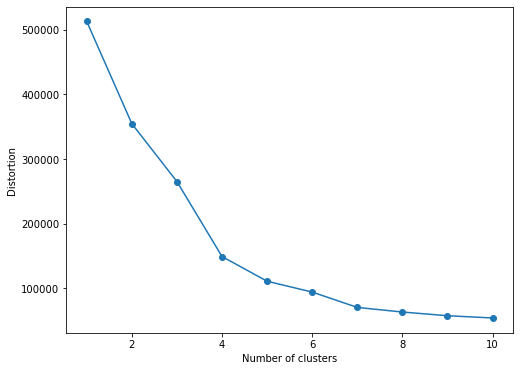

In [118]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [119]:
la = event_df2['event_name'].value_counts().head(300).index.to_list()
event_df2.loc[~event_df2['event_name'].isin(la), 'event_name'] = 'rare_event'

In [46]:
for event in event_df2['event_name'].value_counts().index:
    print(event)

last_event
web.interface.dashboard.page_view
web.home_tab.todo_list.shown
web.page_view.edit_content
todo_list_item.connect_ig_account.done
todo_list_item.verify_email.done
web.page_questionnaire.todo_list_personalization.shown
web.page_view.content
web.builder.add_trigger.click
web.builder.addtrigger.modal.add
todo_list_item.try_ig_automation.started
web.onboarding.run
todo_list_item.do_keyword_onboarding_campaign.started
todo_list_item.try_ig_automation.done
web.home_tab.todo_list.progress_modal.shown
web.interface.settings.pageview
web.builder_tab.create_new_builder_overlay.shown
web.builder_tab.create_new_builder_overlay.closed
web.builder.starting_step_node_sidebar.opened
mobile.automations_list__opened
web.dashboard.product_tips.show
web.builder_tab.new_builder.clicked
web.interface.live_chat.pageview
web.builder_tab.quick_campaign_list.shown
web.builder.keyword_created
web.page_view.tutorial.show
mobile.automations_promo__opened
web.builder.publish_attempt
web.interface.audience

In [47]:
event_df2[(event_df2['event_name'].notnull())&(event_df2['event_name'].str.contains('todo_list_item'))]['event_name'].value_counts()

todo_list_item.connect_ig_account.done                          4996
todo_list_item.verify_email.done                                4948
todo_list_item.try_ig_automation.started                        3145
todo_list_item.do_keyword_onboarding_campaign.started           2605
todo_list_item.try_ig_automation.done                           2581
todo_list_item.start_trial.done                                 1004
todo_list_item.increase_engagement_and_organic_reach.started     108
todo_list_item.start_trial.started                                76
todo_list_item.redirect_customers_to_landing_page.started         35
todo_list_item.enable_story_mention_reply.started                 35
todo_list_item.automate_answers_on_common_questions.started       32
Name: event_name, dtype: int64

In [48]:
import retentioneering


# update config to pass columns names:
retentioneering.config.update({
    'user_col': 'client_id',
    'event_col':'event_name',
    'event_time_col':'event_dttm',
})

Cравнение логов у активированных и неактивированных пользователей:

In [161]:
event_df2.rete.plot_graph(norm_type=None,
                     thresh=500,
                       weight_col='client_id',
                       targets = {'last_event':'red',
                                  'todo_list_item.do_keyword_onboarding_campaign.started':'green'})

'experiments/graph_2022-04-01 22_19_25_977063.html'

Кластеризация активированных пользователей

array([3, 1, 1, ..., 3, 1, 0])

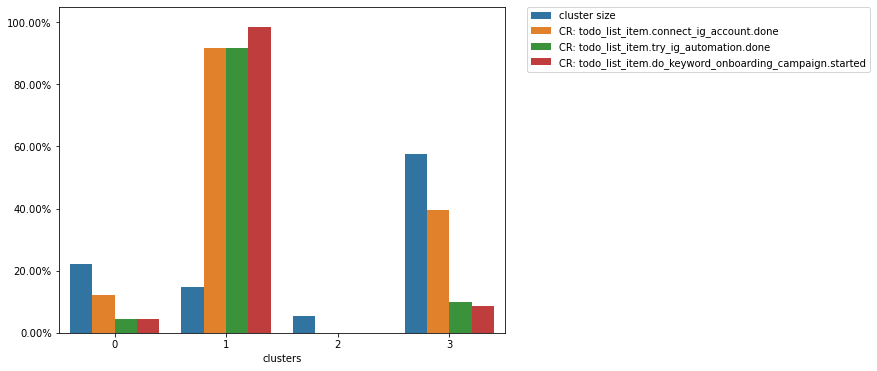

In [160]:
event_df2.rete.get_clusters(method='kmeans',
                       feature_type='tfidf',
                       n_clusters=4,
                       ngram_range=(1,2),
                       plot_type='cluster_bar',
                       targets=['todo_list_item.connect_ig_account.done','todo_list_item.try_ig_automation.done', 'todo_list_item.do_keyword_onboarding_campaign.started'])

In [162]:
clus_0 = event_df2.rete.filter_cluster(0)
clus_1 = event_df2.rete.filter_cluster(1)
clus_2 = event_df2.rete.filter_cluster(2)
clus_3 = event_df2.rete.filter_cluster(3)

In [126]:
c0 = set(clus_0['client_id'])
c1 = set(clus_1['client_id'])
c2 = set(clus_2['client_id'])
c3 = set(clus_3['client_id'])

In [233]:
len(c3)

7404

In [127]:
event_df2.loc[event_df2['client_id'].isin(c0), 'Группа'] = 0
event_df2.loc[event_df2['client_id'].isin(c1), 'Группа'] = 1
event_df2.loc[event_df2['client_id'].isin(c2), 'Группа'] = 2
event_df2.loc[event_df2['client_id'].isin(c3), 'Группа'] = 3

In [132]:
event_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170848 entries, 0 to 170847
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   client_id                  170848 non-null  int64         
 1   event_name                 170848 non-null  object        
 2   event_dttm                 168715 non-null  datetime64[ns]
 3   session_id                 170848 non-null  float64       
 4   is_first_event_in_session  158001 non-null  object        
 5   time_on_page               135745 non-null  float64       
 6   first_session              158001 non-null  object        
 7   Группа                     170848 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 10.4+ MB


In [139]:
group_by_claster = event_df2.groupby(by= ['Группа'])['client_id', 'event_name', 'time_on_page'].agg({'client_id':'nunique','event_name':'count', 'time_on_page':'sum'}).reset_index()
group_by_claster['event_per_client'] = group_by_claster['event_name'] / group_by_claster['client_id']
group_by_claster['time_on_page_per_client'] = group_by_claster['time_on_page'] / group_by_claster['client_id']

<ipython-input-139-863f09978624>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [141]:
group_by_claster['event_per_client'] = group_by_claster['event_name'] / group_by_claster['client_id']
group_by_claster['time_on_page_per_client'] = group_by_claster['time_on_page'] / group_by_claster['client_id']

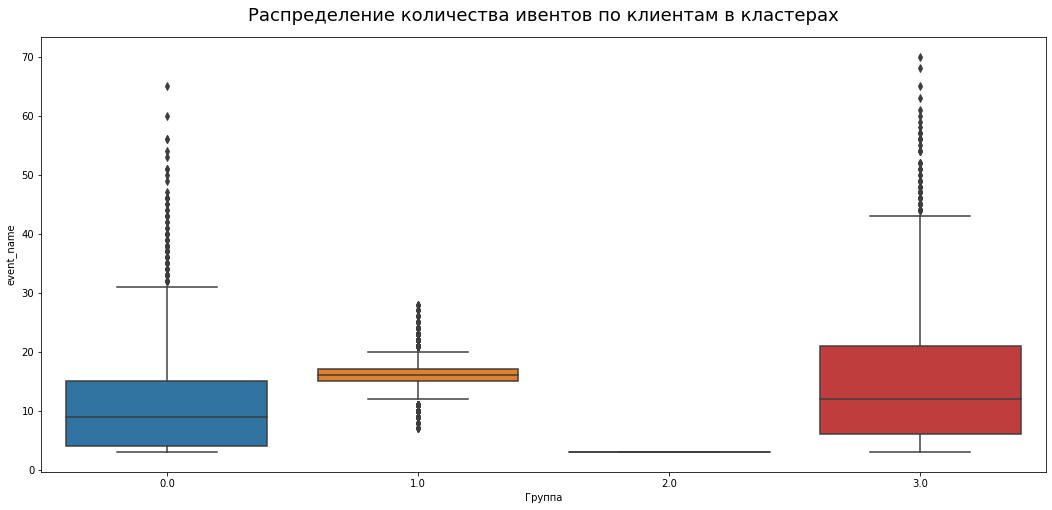

In [156]:
plt.figure(figsize=(18, 8))
boxplot = sns.boxplot(x = 'Группа', y = 'event_name', data = event_df2.groupby(by= ['Группа', 'client_id'])['event_name'].count().reset_index())
boxplot.set_title('Распределение количества ивентов по клиентам в кластерах', fontdict={'fontsize':18}, pad=16)
plt.show()

In [153]:
event_df2.groupby(by= ['Группа', 'client_id'])['event_name'].count().reset_index()

,Группа,client_id,event_name
0,0.0,100003,20
1,0.0,100012,4
2,0.0,100014,10
3,0.0,100017,26
4,0.0,100029,12
...,...,...,...
12842,3.0,115954,6
12843,3.0,115956,10
12844,3.0,115960,23
12845,3.0,115963,25


In [180]:
clus_3['client_id'].nunique()

7404

In [178]:
clus_3.rete.plot_graph(norm_type=None,
                     thresh=600,
                       weight_col='client_id',
                       targets = {'last_event':'red',
                                  'todo_list_item.do_keyword_onboarding_campaign.started':'green'})

'experiments/graph_2022-04-01 23_25_57_170695.html'

,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13
todo_list_item.connect_ig_account.done,0.506334,0.076392,0.045681,0.032630,0.001919,0.001152,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
web.interface.dashboard.page_view,0.035701,0.632246,0.011516,0.034165,0.053743,0.002303,0.0,0.000768,0.000000,0.000768,0.000384,0.000768,0.000000,0.000000,0.000384,0.000000,0.000384,0.000000,0.000000,0.000384
web.home_tab.todo_list.shown,0.028791,0.038004,0.707486,0.008061,0.041075,0.057582,0.0,0.000000,0.000768,0.000000,0.000384,0.000000,0.001152,0.000000,0.000000,0.000384,0.000000,0.000384,0.000000,0.000000
todo_list_item.try_ig_automation.started,0.001536,0.006142,0.016507,0.799232,0.018810,0.040691,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000768,0.000000,0.000768,0.000000,0.000384,0.000768,0.000000
todo_list_item.try_ig_automation.done,0.001536,0.001152,0.003071,0.010749,0.819962,0.017658,0.0,0.000000,0.000000,0.000384,0.000000,0.000000,0.000384,0.000768,0.000384,0.000000,0.000000,0.000000,0.000384,0.000768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobile.dialog__title__done,0.000384,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.001152,0.000384,0.000768,0.000384,0.000384,0.000384,0.001152,0.000768,0.000768,0.000000
mobile.automations_list__opened,0.000000,0.000768,0.000384,0.000000,0.000384,0.000000,0.0,0.000384,0.001152,0.001536,0.002303,0.005374,0.004990,0.007294,0.004607,0.003839,0.003071,0.003455,0.003839,0.002303
web.builder_tab.create_new_builder_overlay.shown,0.007294,0.001152,0.001536,0.002687,0.000000,0.000384,0.0,0.007678,0.002303,0.003839,0.001919,0.002687,0.003071,0.004607,0.005374,0.003455,0.003071,0.002687,0.003839,0.003071
web.builder_tab.quick_campaign_list.industry_filters.click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000384,0.000000,0.000000,0.000000,0.000000,0.000000


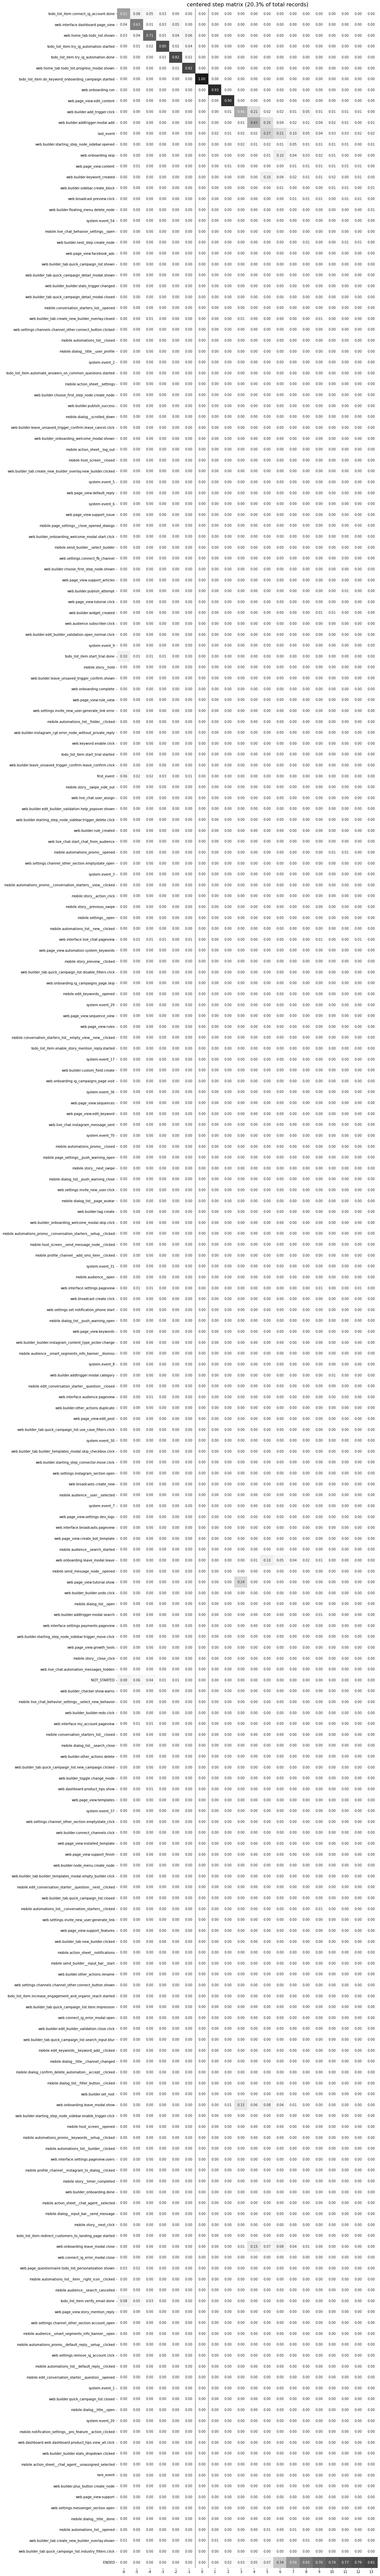

In [124]:
event_df2.rete.step_matrix(max_steps=20,
                        centered={'event': 'todo_list_item.do_keyword_onboarding_campaign.started',
                                  'left_gap': 6,
                                  'occurrence': 1})

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
first_event,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
web.page_questionnaire.todo_list_personalization.shown,0.0,0.343733,0.000000,0.000135,0.000000,0.000000,0.000135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000135,0.000000,0.000000
todo_list_item.verify_email.done,0.0,0.025122,0.311858,0.041734,0.009184,0.000135,0.000405,0.000675,0.000270,0.000540,0.000135,0.000135,0.000000,0.000000,0.000000,0.000000
todo_list_item.connect_ig_account.done,0.0,0.001080,0.029579,0.312129,0.042004,0.009184,0.000135,0.000405,0.000675,0.000270,0.000540,0.000135,0.000135,0.000000,0.000000,0.000000
web.interface.dashboard.page_view,0.0,0.257293,0.058212,0.090897,0.260400,0.060103,0.005538,0.002836,0.003106,0.003512,0.002701,0.002296,0.001756,0.001486,0.001486,0.000810
web.home_tab.todo_list.shown,0.0,0.003106,0.145867,0.020935,0.027012,0.289708,0.059697,0.003512,0.002161,0.002566,0.002161,0.001486,0.001621,0.000810,0.001351,0.001351
web.builder_tab.create_new_builder_overlay.closed,0.0,0.000270,0.000675,0.002971,0.002836,0.013371,0.010130,0.011750,0.084279,0.061318,0.028093,0.020124,0.017693,0.008239,0.003917,0.003782
web.page_view.content,0.0,0.032280,0.023366,0.052269,0.044300,0.044300,0.028498,0.096704,0.067936,0.035656,0.024851,0.023366,0.012696,0.006483,0.005538,0.006213
web.page_view.edit_content,0.0,0.031334,0.012696,0.016478,0.052134,0.034576,0.030524,0.029444,0.029038,0.019449,0.050648,0.066721,0.037277,0.022825,0.016883,0.012831
last_event,0.0,0.000000,0.062939,0.100621,0.047002,0.041194,0.063479,0.062129,0.040654,0.035116,0.036197,0.035251,0.031469,0.028903,0.028093,0.025122


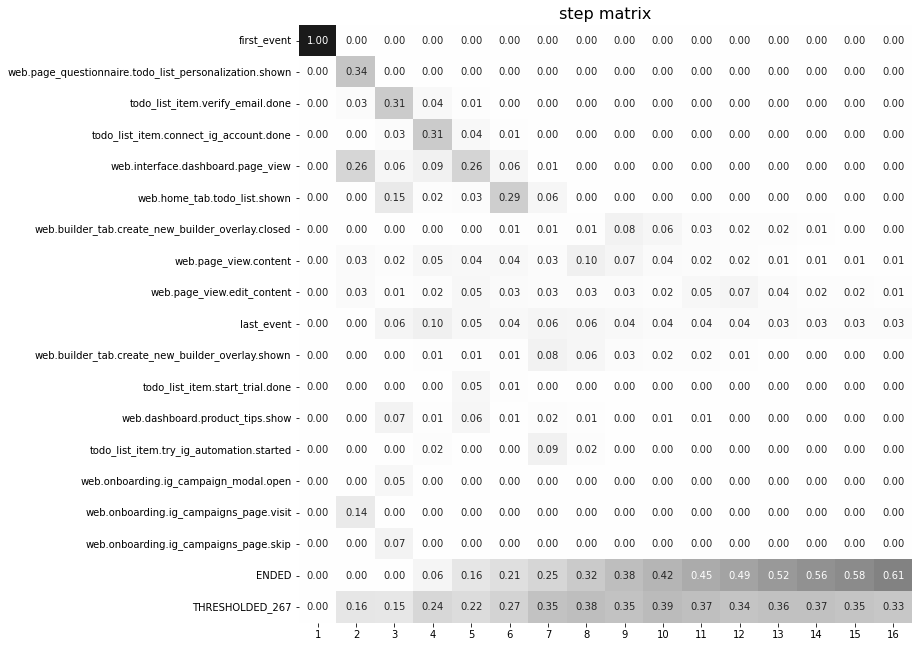

In [179]:
clus_3.rete.step_matrix(max_steps=16,
                      thresh=0.05)

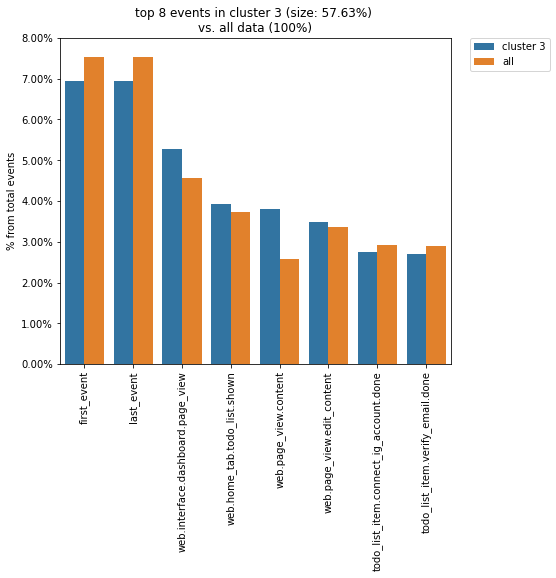

In [181]:
event_df2.rete.cluster_event_dist(3)

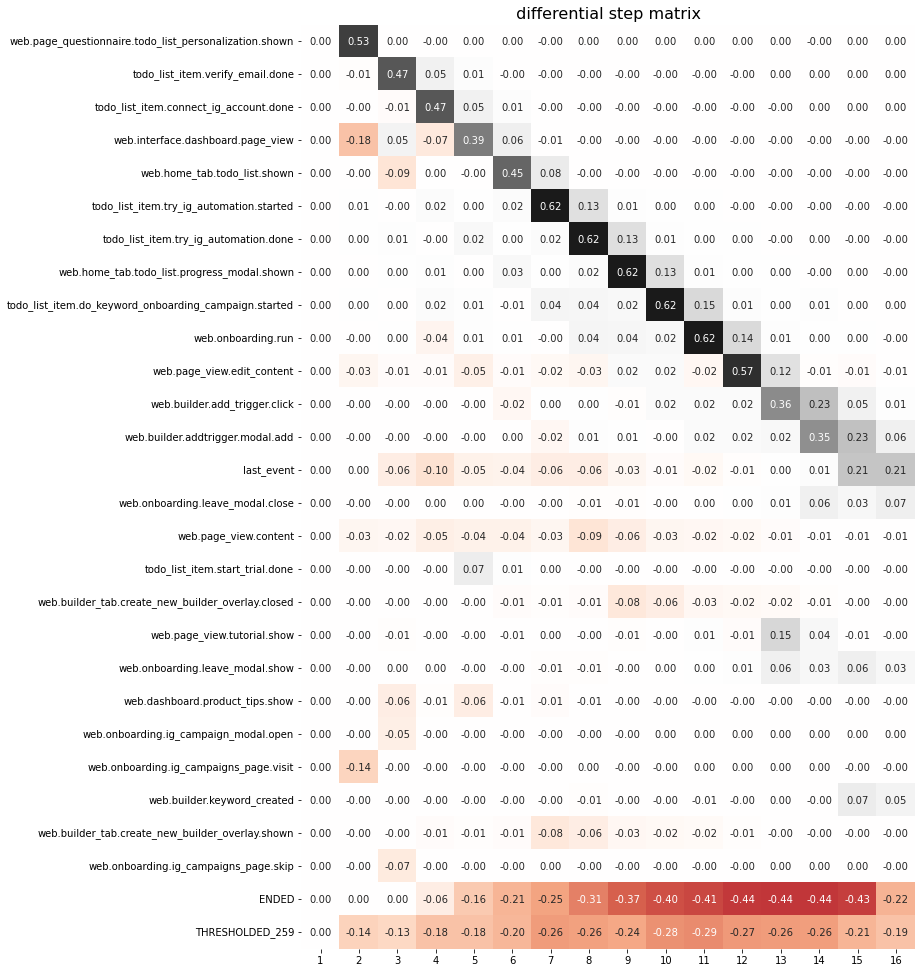

In [184]:
event_df2.rete.step_matrix(max_steps=16,
                      thresh = 0.05,
                      groups=(c1, c3));

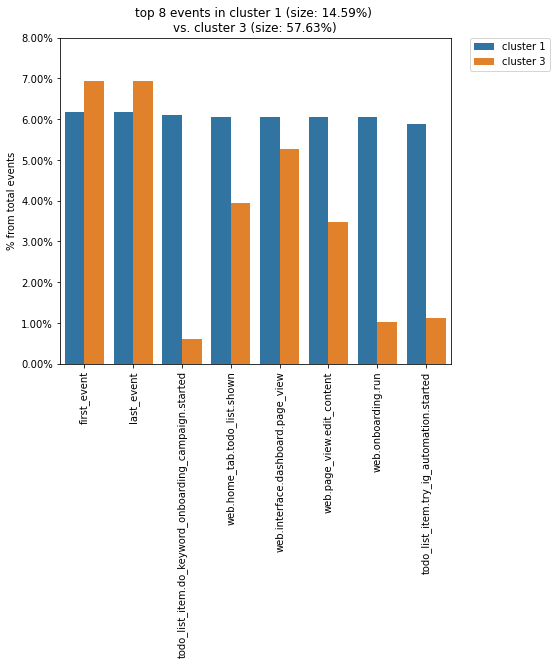

In [187]:
# сравнение между собой 2х кластеров (1 и 2)
event_df2.rete.cluster_event_dist(1, 3)

C:\Users\Lemae\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Lemae\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



,0,1
100000,-28.083412,8.698497
100001,4.055233,38.463562
100002,4.326891,39.289494
100003,-40.027546,24.007378
100004,-6.919266,25.254246
...,...,...
115962,-64.078201,-2.995245
115963,-11.407921,-10.220639
115964,-14.808910,-4.140723
115966,-8.749373,18.003582


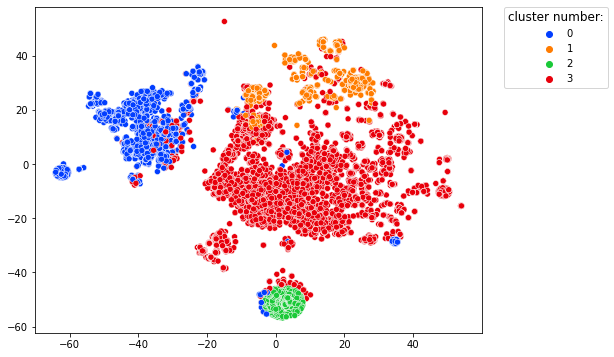

In [188]:
# Визуализация кластеров
event_df2.rete.project(plot_type ='clusters',
                  method='tsne',
                  perplexity=128)

C:\Users\Lemae\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Lemae\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



,0,1
100000,-28.083412,8.698497
100001,4.055233,38.463562
100002,4.326891,39.289494
100003,-40.027546,24.007378
100004,-6.919266,25.254246
...,...,...
115962,-64.078201,-2.995245
115963,-11.407921,-10.220639
115964,-14.808910,-4.140723
115966,-8.749373,18.003582


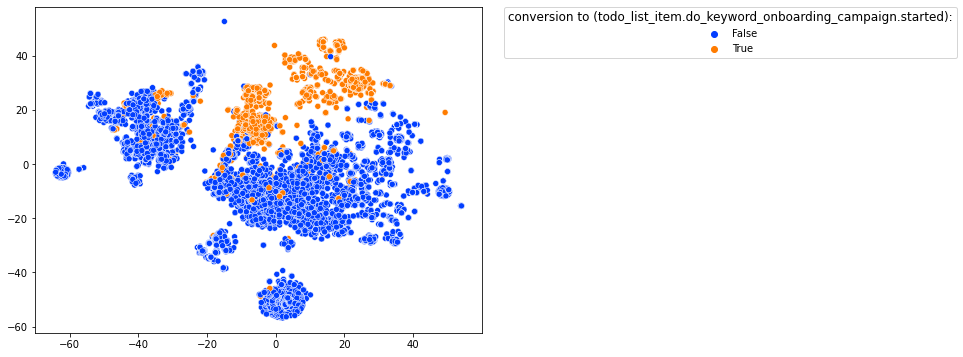

In [189]:
event_df2.rete.project(plot_type ='targets',
                  targets = ['todo_list_item.do_keyword_onboarding_campaign.started'],
                  method='tsne',
                  perplexity = 128)

In [290]:
df.loc[df['client_id'].isin(c0), 'Группа'] = 0
df.loc[df['client_id'].isin(c1), 'Группа'] = 1
df.loc[df['client_id'].isin(c2), 'Группа'] = 2
df.loc[df['client_id'].isin(c3), 'Группа'] = 3

In [291]:
df1 = df.drop_duplicates(subset = 'client_id')

In [292]:
df1

,Unnamed: 0,account_id,account_creationdate,client_id,client_creationdate,admin_status,country_group,industry,hear_source,support_provided,...,current_account_status,ltv_predicted,ig_activation_dttm,trial_dttm,paid_dttm,pro_dttm,first_ig_flow_publish_dttm,event_name,event_dttm,Группа
0,0,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,free,9679,NaN,NaN,NaN,NaN,NaN,mobile.automations_list__opened,2021-10-05 21:10:36.267423,3.0
28,28,2,2021-10-21 10:54:09.299865,100001,2021-10-21 10:48:38.785303,1st admin,South America,Personal blog,Social media,False,...,free,1570,NaN,NaN,NaN,NaN,2021-10-21 11:07:41.655267,web.builder.addtrigger.modal.add,2021-10-21 11:07:06.864483,1.0
45,45,3,2021-09-30 12:04:12.263688,100002,2021-09-30 12:02:37.514603,1st admin,South America,Other,Search Engine,False,...,free,-5841,NaN,NaN,NaN,NaN,2021-09-30 12:09:50.286770,web.builder.addtrigger.modal.add,2021-09-30 12:09:35.794417,1.0
61,61,4,2021-10-20 06:07:09.532984,100003,2021-10-20 05:18:36.190985,1st admin,South America,Infopreneurship,Recommended by friend or colleague,False,...,expired,-5580,NaN,2021-10-20 06:09:35.887671,NaN,2021-10-20 06:09:34.000000,2021-10-20 06:45:45.668886,mobile.edit_conversation_starter__question__ne...,2021-10-20 06:45:45.133076,0.0
81,81,5,2021-10-04 02:09:54.675728,100004,2021-10-04 02:07:56.478409,1st admin,Asia,Local business or place,Search Engine,False,...,pro,13050,2021-10-04 10:12:56.910884,2021-10-04 02:21:38.390630,2021-10-16 02:24:09.000000,2021-10-04 02:21:37.000000,2021-10-04 02:15:05.160874,web.builder.addtrigger.modal.add,2021-10-04 02:14:53.879521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869129,869129,17553,2021-10-25 04:12:34.862593,115965,2020-07-21 04:26:07.233909,1st admin,North America,E-commerce,Recommended by friend or colleague,False,...,free,13164,NaN,NaN,NaN,NaN,NaN,web.dashboard.product_tips.show,2021-10-25 04:21:34.370200,NaN
869134,869134,17555,2021-09-26 23:37:20.765786,115966,2021-09-26 23:31:20.184660,1st admin,Asia,"Fun (jokes, community, daily quotes, etc.)",Search Engine,False,...,expired,-5922,NaN,2021-09-26 23:39:47.207375,2021-10-03 23:40:33.000000,2021-09-26 23:39:46.000000,2021-09-26 23:48:03.360046,mobile.automations_promo__default_reply__setup...,2021-09-26 23:48:03.089337,1.0
869155,869155,17557,2021-10-08 22:47:06.699027,115967,2016-11-29 22:26:12.883208,1st admin,Asia,Professional consulting,Recommended by friend or colleague,False,...,pro,2060,2021-10-13 20:50:55.778229,2021-10-14 17:46:43.322435,2021-10-21 17:47:49.000000,2021-10-14 17:46:42.000000,2021-10-08 23:11:31.042541,web.builder.starting_step_node_sidebar.enable_...,2021-10-08 23:11:31.028170,NaN
869269,869269,17558,2021-10-06 13:42:29.943818,115968,2021-10-06 12:51:23.990275,other admin,South America,"Celebrity, Artist or Public Figure",Search Engine,False,...,expired,10217,2021-10-07 11:13:34.274552,2021-10-06 14:51:10.049858,2021-10-18 14:52:22.000000,2021-10-06 14:51:08.000000,2021-10-06 13:42:30.192963,NaN,NaN,NaN


In [294]:
df = df1.copy()

In [271]:
df['Группа'] = str(df['Группа'])

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15970 entries, 0 to 869270
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  15970 non-null  int64  
 1   account_id                  15970 non-null  int64  
 2   account_creationdate        15963 non-null  object 
 3   client_id                   15970 non-null  int64  
 4   client_creationdate         15945 non-null  object 
 5   admin_status                15970 non-null  object 
 6   country_group               15822 non-null  object 
 7   industry                    15970 non-null  object 
 8   hear_source                 15970 non-null  object 
 9   support_provided            15970 non-null  bool   
 10  initial_channel             15970 non-null  object 
 11  ig_followerscount           15968 non-null  float64
 12  ig_enable_dttm              15970 non-null  object 
 13  traffic_source              15

In [265]:
df = df[df['Группа'].notnull()]

In [256]:
df[df['Группа'] == 3]['country_group'].value_counts()

South America                 2933
Asia                          1681
Russian Speaking Countries     736
Europe                         687
United States                  682
North America                  442
Africa                         171
Other                           19
Name: country_group, dtype: int64

In [310]:
group_by_param = df.groupby(by= ['Группа', 'hear_source'])['client_id'].nunique().reset_index()

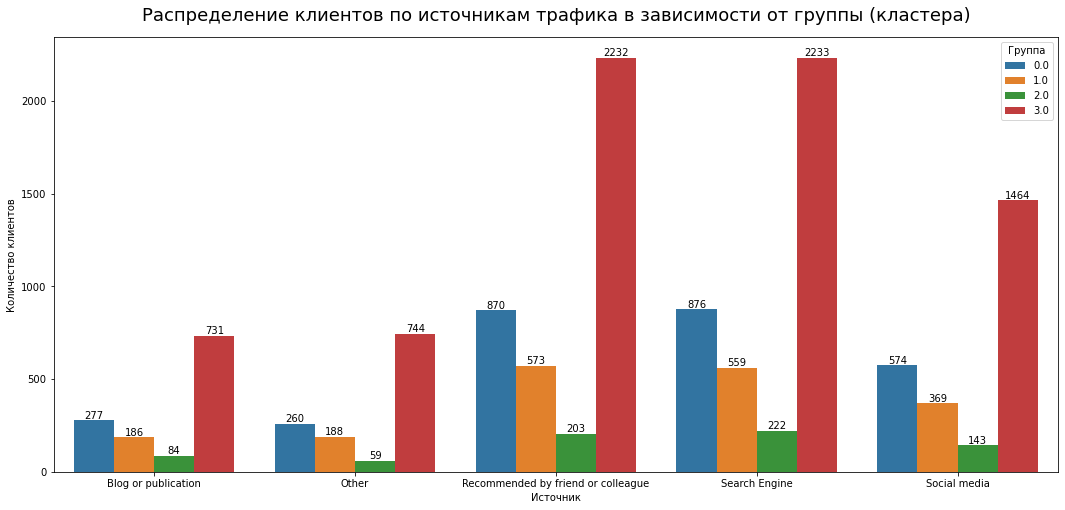

In [312]:
plt.figure(figsize=(18, 8))
chart = sns.barplot(x='hear_source', y='client_id', hue = 'Группа', data=group_by_param)
plt.xlabel('Источник')
plt.ylabel('Количество клиентов')
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
chart.set_title('Распределение клиентов по источникам трафика в зависимости от группы (кластера)', fontdict={'fontsize':18}, pad=16)
plt.show()

In [216]:
df1[df1['Группа'] == 0]['paid_dttm'].count() / df1[df1['Группа'] == 0]['account_id'].count()

0.03885194259712986

In [217]:
df1[df1['Группа'] == 1]['paid_dttm'].count() / df1[df1['Группа'] == 1]['account_id'].count()

0.17546666666666666

In [218]:
df1[df1['Группа'] == 2]['paid_dttm'].count() / df1[df1['Группа'] == 2]['account_id'].count()

0.1111111111111111

In [219]:
df1[df1['Группа'] == 3]['paid_dttm'].count() / df1[df1['Группа'] == 3]['account_id'].nunique()

0.13101026472177202

In [225]:
df1

,Unnamed: 0,account_id,account_creationdate,client_id,client_creationdate,admin_status,country_group,industry,hear_source,support_provided,...,current_account_status,ltv_predicted,ig_activation_dttm,trial_dttm,paid_dttm,pro_dttm,first_ig_flow_publish_dttm,event_name,event_dttm,Группа
10,10,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,free,9679,NaN,NaN,NaN,NaN,NaN,web.page_questionnaire.todo_list_personalizati...,2021-10-05 20:40:49.401840,3.0
44,44,2,2021-10-21 10:54:09.299865,100001,2021-10-21 10:48:38.785303,1st admin,South America,Personal blog,Social media,False,...,free,1570,NaN,NaN,NaN,NaN,2021-10-21 11:07:41.655267,web.page_questionnaire.todo_list_personalizati...,2021-10-21 10:55:46.023532,1.0
60,60,3,2021-09-30 12:04:12.263688,100002,2021-09-30 12:02:37.514603,1st admin,South America,Other,Search Engine,False,...,free,-5841,NaN,NaN,NaN,NaN,2021-09-30 12:09:50.286770,web.page_questionnaire.todo_list_personalizati...,2021-09-30 12:05:05.381512,1.0
80,80,4,2021-10-20 06:07:09.532984,100003,2021-10-20 05:18:36.190985,1st admin,South America,Infopreneurship,Recommended by friend or colleague,False,...,expired,-5580,NaN,2021-10-20 06:09:35.887671,NaN,2021-10-20 06:09:34.000000,2021-10-20 06:45:45.668886,web.page_questionnaire.todo_list_personalizati...,2021-10-20 06:10:06.876242,0.0
97,97,5,2021-10-04 02:09:54.675728,100004,2021-10-04 02:07:56.478409,1st admin,Asia,Local business or place,Search Engine,False,...,pro,13050,2021-10-04 10:12:56.910884,2021-10-04 02:21:38.390630,2021-10-16 02:24:09.000000,2021-10-04 02:21:37.000000,2021-10-04 02:15:05.160874,web.page_questionnaire.todo_list_personalizati...,2021-10-04 02:11:48.236731,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869062,869062,17550,2017-07-26 16:36:36.648325,115962,2017-07-26 16:36:20.796611,1st admin,Africa,Professional consulting,Social media,False,...,expired,3880,NaN,NaN,NaN,NaN,2021-09-20 13:31:54.145342,mobile.automations_promo__default_reply__setup...,2021-09-20 13:31:52.827302,0.0
869090,869090,17551,2021-09-27 21:37:08.774922,115963,2021-09-27 21:01:55.796810,1st admin,South America,Personal blog,Other,False,...,free,9723,NaN,NaN,NaN,NaN,NaN,web.page_questionnaire.todo_list_personalizati...,2021-09-27 21:38:53.486325,3.0
869128,869128,17552,2021-09-24 05:36:02.605336,115964,2021-09-24 04:41:35.299848,1st admin,South America,Unknown,Other,False,...,free,-4922,NaN,NaN,NaN,NaN,NaN,web.page_questionnaire.todo_list_personalizati...,2021-09-24 05:36:31.466922,3.0
869154,869154,17555,2021-09-26 23:37:20.765786,115966,2021-09-26 23:31:20.184660,1st admin,Asia,"Fun (jokes, community, daily quotes, etc.)",Search Engine,False,...,expired,-5922,NaN,2021-09-26 23:39:47.207375,2021-10-03 23:40:33.000000,2021-09-26 23:39:46.000000,2021-09-26 23:48:03.360046,web.page_questionnaire.todo_list_personalizati...,2021-09-26 23:41:02.563596,1.0


In [210]:
df['ltv_predicted'].max()

14998

In [226]:
df1[df1['paid_dttm'].notnull()]

,Unnamed: 0,account_id,account_creationdate,client_id,client_creationdate,admin_status,country_group,industry,hear_source,support_provided,...,current_account_status,ltv_predicted,ig_activation_dttm,trial_dttm,paid_dttm,pro_dttm,first_ig_flow_publish_dttm,event_name,event_dttm,Группа
97,97,5,2021-10-04 02:09:54.675728,100004,2021-10-04 02:07:56.478409,1st admin,Asia,Local business or place,Search Engine,False,...,pro,13050,2021-10-04 10:12:56.910884,2021-10-04 02:21:38.390630,2021-10-16 02:24:09.000000,2021-10-04 02:21:37.000000,2021-10-04 02:15:05.160874,web.page_questionnaire.todo_list_personalizati...,2021-10-04 02:11:48.236731,1.0
2467,2467,30,2021-10-20 06:40:17.375376,100029,2021-10-20 06:35:07.638786,1st admin,South America,Other,Search Engine,False,...,pro,4533,2021-10-20 11:21:18.446705,2021-10-20 06:46:12.948334,2021-10-27 06:46:58.000000,2021-10-20 06:46:11.000000,2021-10-20 06:57:12.983902,web.page_questionnaire.todo_list_personalizati...,2021-10-20 06:51:08.760531,0.0
2484,2484,31,2021-10-26 08:03:29.202925,100030,2021-10-26 08:01:38.663731,1st admin,Asia,Local business or place,Recommended by friend or colleague,False,...,pro,-3918,2021-11-04 13:57:35.850723,2021-10-28 21:57:41.018878,2021-11-04 21:58:15.000000,2021-10-28 21:57:39.000000,2021-10-26 08:08:52.800711,web.page_questionnaire.todo_list_personalizati...,2021-10-26 08:04:47.617711,1.0
2818,2818,38,2021-10-19 15:23:33.720250,100037,2021-10-19 15:03:12.692520,1st admin,North America,E-commerce,Blog or publication,False,...,pro,5939,NaN,2021-10-20 04:08:10.216942,2021-10-27 04:08:34.000000,2021-10-20 04:08:07.000000,NaN,web.onboarding.ig_campaigns_page.visit,2021-10-19 16:35:26.492821,3.0
5511,5511,57,2021-09-20 19:08:55.993548,100056,2021-09-20 14:17:00.219737,1st admin,Asia,Local business or place,Social media,False,...,pro,-8674,2021-09-21 21:16:23.010321,2021-09-20 19:23:27.535083,2021-09-27 19:23:53.000000,2021-09-20 19:23:26.000000,2021-09-20 19:27:03.624650,web.page_questionnaire.todo_list_personalizati...,2021-09-20 19:24:48.784095,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866752,866752,17446,2021-10-27 02:25:33.135909,115873,2021-10-27 02:25:25.696320,1st admin,South America,Other,Other,False,...,pro,10558,2021-10-27 10:31:19.378872,2021-10-27 04:43:23.645160,2021-11-03 04:43:38.000000,2021-10-27 04:43:22.000000,2021-10-27 03:11:13.847420,mobile.audience__open,2021-10-27 02:29:19.101195,3.0
866922,866922,17455,2021-10-14 10:13:17.546483,115881,2021-10-14 10:06:01.039085,1st admin,South America,Infopreneurship,Other,False,...,pro,12491,2021-10-14 19:07:12.618065,2021-10-14 10:38:56.166136,2021-10-21 10:40:31.000000,2021-10-14 10:38:55.000000,2021-10-14 10:17:13.583488,web.page_questionnaire.todo_list_personalizati...,2021-10-14 10:14:21.674346,1.0
868365,868365,17508,2021-09-18 12:37:51.109520,115927,2021-09-18 12:32:50.178663,1st admin,Europe,Professional consulting,Social media,True,...,pro,5596,2021-09-18 17:38:13.619216,2021-09-18 12:41:05.477189,2021-10-03 12:41:04.000000,2021-09-18 12:41:04.000000,2021-09-18 12:47:17.985341,web.page_questionnaire.todo_list_personalizati...,2021-09-18 12:41:52.189314,1.0
868462,868462,17518,2021-09-24 16:17:09.453307,115935,2021-09-24 16:07:59.450150,1st admin,South America,Infopreneurship,Recommended by friend or colleague,False,...,pro,-4344,2021-10-22 15:57:59.201132,2021-09-26 17:35:18.796576,2021-10-11 17:35:31.000000,2021-09-26 17:35:17.000000,2021-09-25 07:43:28.209951,web.page_questionnaire.todo_list_personalizati...,2021-09-25 07:33:26.077908,1.0


In [227]:
for_ltv = df1[df1['paid_dttm'].notnull()].groupby(by= ['Группа'])['client_id', 'ltv_predicted'].agg({'client_id':'nunique', 'ltv_predicted':'sum'}).reset_index()
for_ltv['ltv_per_client'] = for_ltv['ltv_predicted'] / for_ltv['client_id']

<ipython-input-227-8b13b8dc6905>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [211]:
for_ltv

,Группа,account_id,ltv_predicted,ltv_per_client
0,0.0,2858,224496317,78550.145906
1,1.0,1878,83405082,44411.651757
2,2.0,714,1484246,2078.775910
3,3.0,7417,1190435590,160500.955912


In [200]:
event_df2.rete.funnel(targets = ['first_event','todo_list_item.connect_ig_account.done','todo_list_item.try_ig_automation.done', 'todo_list_item.do_keyword_onboarding_campaign.started'],
                 groups = (c0, c1, c2, c3),
                 group_names = ('Mobile First', 'Фолловеры обучения', 'Проходил мимо', 'Серая масса'))